In [277]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from scipy import stats
from sklearn.ensemble import RandomForestClassifier
import warnings # ignores pink warnings
warnings.filterwarnings('ignore')

In [279]:
df = pd.read_csv('dataset.csv')

In [281]:
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.00,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.67,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.00,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.40,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.00,0,13.9,-0.3,0.79,Graduate


In [283]:
df.shape

(4424, 35)

In [285]:
df.duplicated().sum()

0

In [287]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

In [289]:
from pandas.io.formats.format import set_option
set_option('display.precision',2)
df.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,...,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4.42e+03
mean,1.18,6.89,1.73,9.90,0.89,2.53,1.25,12.32,16.46,7.32,...,0.14,0.54,6.23,8.06,4.44,10.23,0.15,11.57,1.23,1.97e-03
std,0.61,5.30,1.31,4.33,0.31,3.96,1.75,9.03,11.04,4.00,...,0.69,1.92,2.20,3.95,3.01,5.21,0.75,2.66,1.38,2.27e+00
min,1.00,1.00,0.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,7.60,-0.80,-4.06e+00
25%,1.00,1.00,1.00,6.00,1.00,1.00,1.00,2.00,3.00,5.00,...,0.00,0.00,5.00,6.00,2.00,10.75,0.00,9.40,0.30,-1.70e+00
50%,1.00,8.00,1.00,10.00,1.00,1.00,1.00,13.00,14.00,6.00,...,0.00,0.00,6.00,8.00,5.00,12.20,0.00,11.10,1.40,3.20e-01
75%,1.00,12.00,2.00,13.00,1.00,1.00,1.00,22.00,27.00,10.00,...,0.00,0.00,7.00,10.00,6.00,13.33,0.00,13.90,2.60,1.79e+00
max,6.00,18.00,9.00,17.00,1.00,17.00,21.00,29.00,34.00,32.00,...,12.00,19.00,23.00,33.00,20.00,18.57,12.00,16.20,3.70,3.51e+00


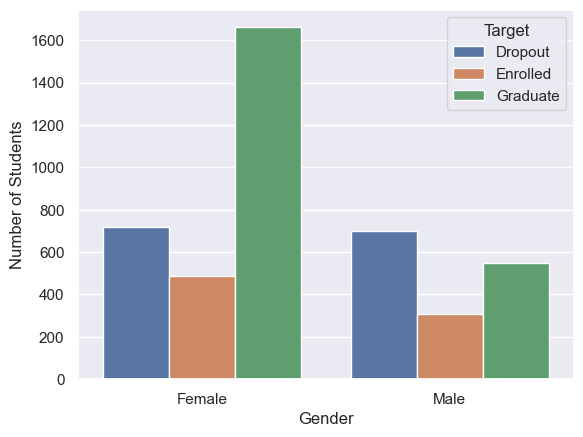

In [291]:
sns.countplot(data=df, x='Gender', hue='Target', hue_order=['Dropout', 'Enrolled', 'Graduate'])
plt.xticks(ticks=[0,1], labels=['Female','Male'])
plt.ylabel('Number of Students')
plt.show()

In [293]:
s_df=df.copy()
s_df.shape

(4424, 35)

In [295]:
s_df = s_df.rename(columns={
    'Marital status' : 'Marital_status' , 'Application order' : 'Application_order',
       'Daytime/evening attendance' : 'attendance', 'Previous qualification': 'Previous_qualification',
       "Mother's qualification" : 'Mothers_qualification', "Father's qualification" : 'Fathers_qualification',
       "Mother's occupation" : 'Mothers_occupation', "Father's occupation" : 'Fathers_occupation',
       'Tuition fees up to date' : 'tuition_paid', 'Scholarship holder' : 'has_scholarship',
       'Age at enrollment' : 'enrollment_age',
    'Curricular units 1st sem (credited)': 'course_sem1_credited',
    'Curricular units 1st sem (enrolled)': 'course_sem1_enrolled',
    'Curricular units 1st sem (evaluations)': 'course_sem1_evaluated',
    'Curricular units 1st sem (approved)': 'course_sem1_passed',
    'Curricular units 1st sem (grade)': 'course_sem1_grade',
    'Curricular units 2nd sem (credited)': 'course_sem2_credited',
    'Curricular units 2nd sem (enrolled)': 'course_sem2_enrolled',
    'Curricular units 2nd sem (evaluations)': 'course_sem2_evaluated',
    'Curricular units 2nd sem (approved)': 'course_sem2_passed',
    'Curricular units 2nd sem (grade)': 'course_sem2_grade',
    'Curricular units 1st sem (without evaluations)': 'course_sem1_uncompleted',
    'Curricular units 2nd sem (without evaluations)': 'course_sem2_uncompleted',

})
print(s_df.columns)

Index(['Marital_status', 'Application mode', 'Application_order', 'Course',
       'attendance', 'Previous_qualification', 'Nacionality',
       'Mothers_qualification', 'Fathers_qualification', 'Mothers_occupation',
       'Fathers_occupation', 'Displaced', 'Educational special needs',
       'Debtor', 'tuition_paid', 'Gender', 'has_scholarship', 'enrollment_age',
       'International', 'course_sem1_credited', 'course_sem1_enrolled',
       'course_sem1_evaluated', 'course_sem1_passed', 'course_sem1_grade',
       'course_sem1_uncompleted', 'course_sem2_credited',
       'course_sem2_enrolled', 'course_sem2_evaluated', 'course_sem2_passed',
       'course_sem2_grade', 'course_sem2_uncompleted', 'Unemployment rate',
       'Inflation rate', 'GDP', 'Target'],
      dtype='object')


In [297]:
s_df = s_df.drop(columns=['Nacionality'], axis=1)
s_df = s_df.drop(columns=['Educational special needs'], axis=1)
s_df = s_df.drop(columns=['International'], axis=1)
s_df = s_df.drop(columns=['Application mode'], axis=1)
s_df = s_df.drop(columns=['Inflation rate'], axis=1)
s_df = s_df.drop(columns=['Unemployment rate'], axis=1)
s_df = s_df.drop(columns=['GDP'], axis=1)

In [299]:
def previous_qualification(val):
    if val in [1, 2, 3, 4]:
        return 0  # Secondary Education
    elif val in [5, 6, 7, 8]:
        return 1  # Post-secondary / Technical
    elif val in [9, 10, 11]:
        return 2  # Bachelor's Degree
    elif val in [12, 13, 14]:
        return 3  # Master's Degree
    elif val in [15, 16, 17]:
        return 4  # Doctorate or high academic degree
    else:
        return None
s_df['Previous_qualification'] = s_df["Previous_qualification"].apply(previous_qualification)

In [301]:
s_df.loc[:,'Target'].value_counts()

Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

In [303]:

s_df['Target'] = LabelEncoder().fit_transform(s_df['Target'])
s_df.loc[:,'Target'].value_counts()
s_df.drop(s_df[s_df["Target"]==1].index, inplace=True)
s_df.loc[:,'Target'].value_counts()

Target
2    2209
0    1421
Name: count, dtype: int64

In [305]:
# mapping integer codes to new values
mapping = {0: 0, 2: 1}
s_df["Target"] = s_df["Target"].replace(mapping)

s_df.loc[:,'Target'].value_counts()

Target
1    2209
0    1421
Name: count, dtype: int64

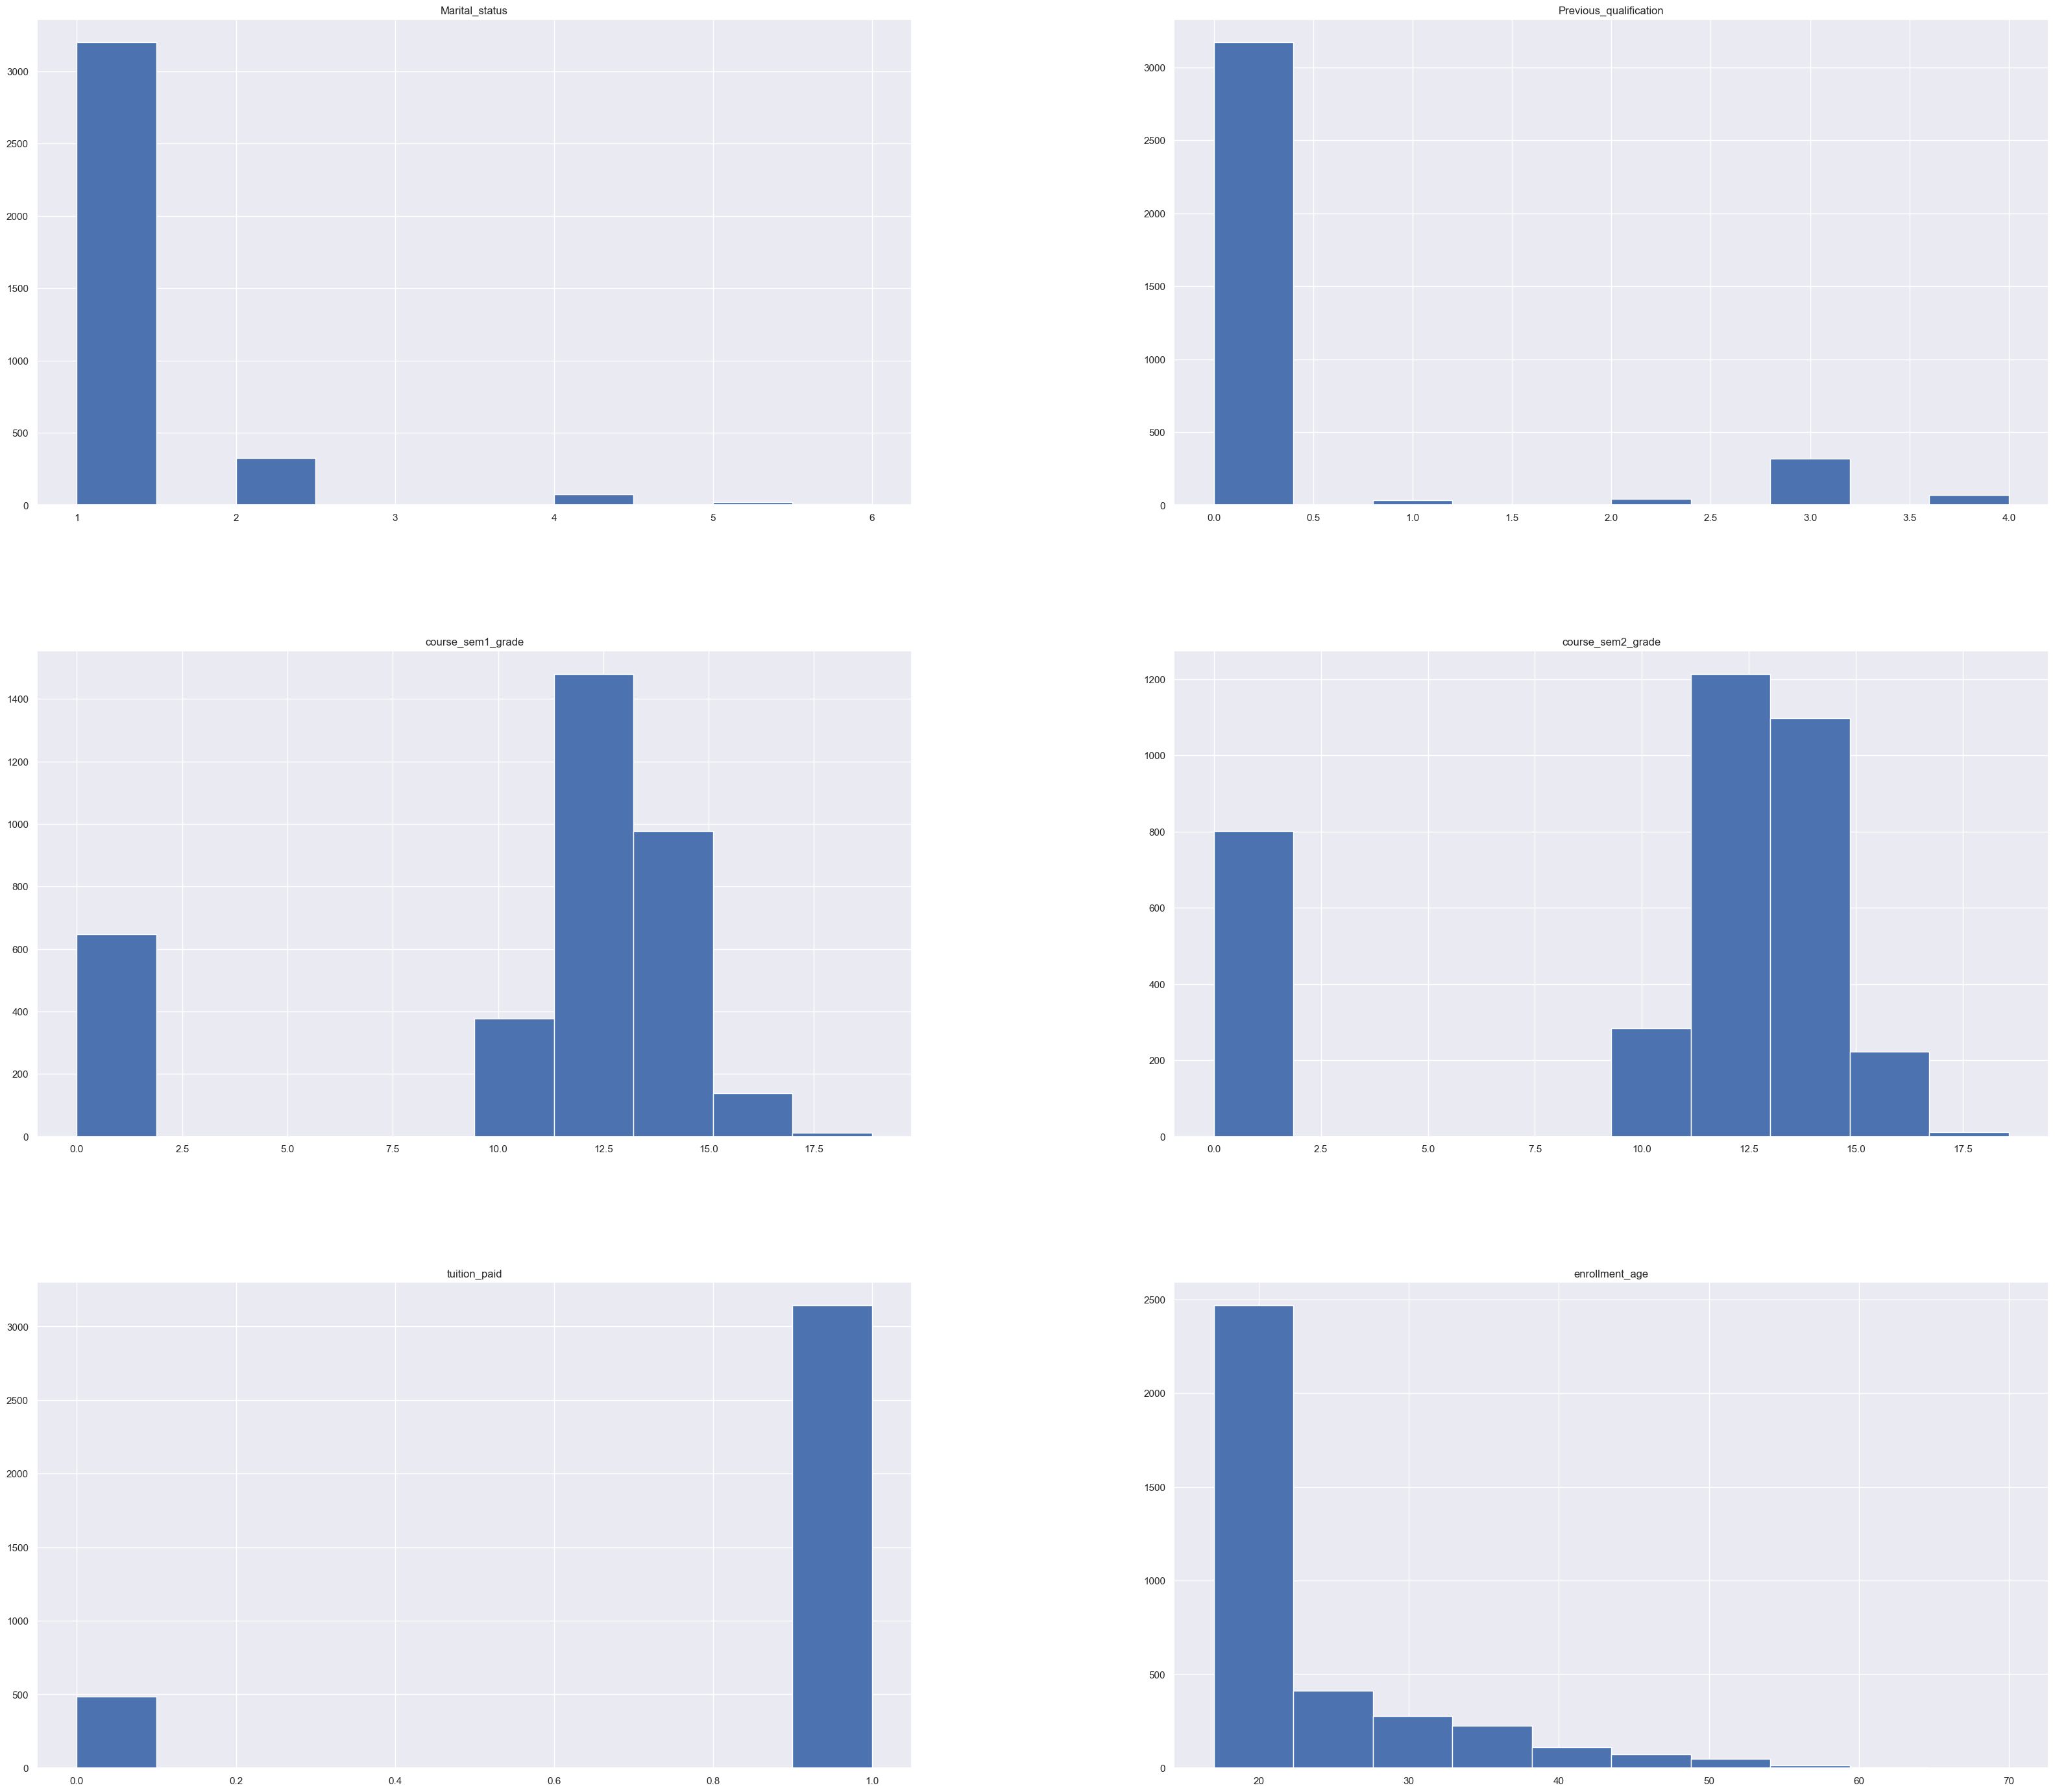

In [307]:
##histogram - visual representation
col = ['Marital_status', 'Previous_qualification', 'course_sem1_grade', 'course_sem2_grade',
       'tuition_paid', 'enrollment_age']
sns.set_theme(style = 'darkgrid')
s_df[col].hist(bins=10, figsize=(40, 35), grid=True, legend=None);

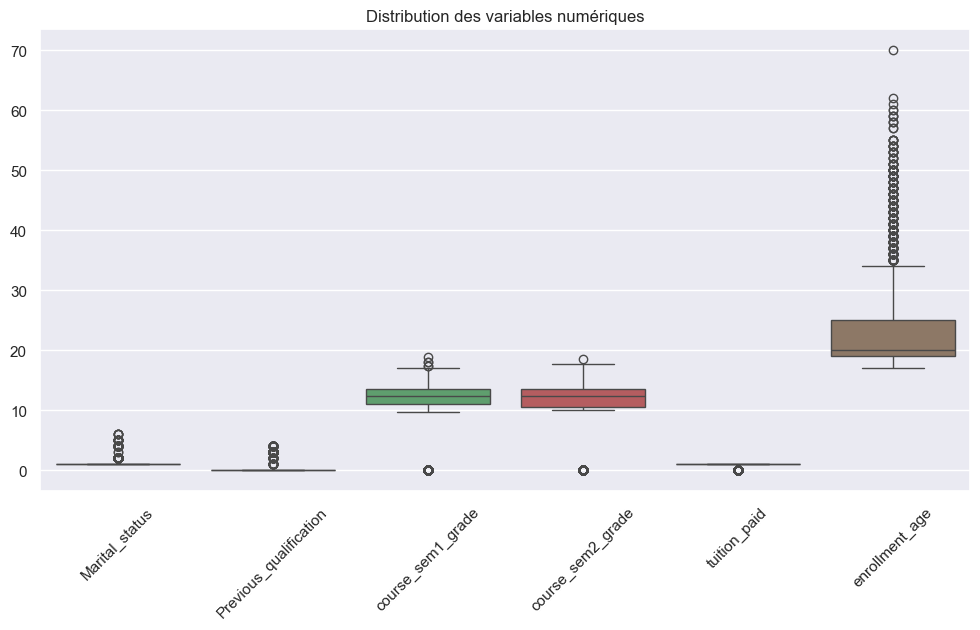

In [309]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(12, 6))
sns.boxplot(data=s_df[col])
plt.title('Distribution des variables numériques')
plt.xticks(rotation=45)
plt.show()

In [311]:
# Calculating the Z-score for each data point
z_scores = np.abs(stats.zscore(s_df))

# Finding data points with a Z-score greater than 3
outliers = np.where(z_scores > 3)

# Printing the indices of the outliers
outliers

(array([   5,    5,   13, ..., 3622, 3622, 3625], dtype=int64),
 array([14, 26,  4, ..., 21, 22,  1], dtype=int64))

In [313]:
# Dropping the corresponding rows from the dataframe
out_df = s_df.drop(s_df.index[outliers[0]])

# Resetting the index of the dataframe
s_df = out_df.reset_index(drop=True)
s_df.shape
s_df

,Marital_status,Application_order,Course,attendance,Previous_qualification,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Displaced,...,course_sem1_passed,course_sem1_grade,course_sem1_uncompleted,course_sem2_credited,course_sem2_enrolled,course_sem2_evaluated,course_sem2_passed,course_sem2_grade,course_sem2_uncompleted,Target
0,1,5,2,1,0,13,10,6,10,1,...,0,0.00,0,0,0,0,0,0.00,0,0
1,1,1,11,1,0,1,3,4,4,1,...,6,14.00,0,0,6,6,6,13.67,0,1
2,1,5,5,1,0,22,27,10,10,1,...,0,0.00,0,0,6,0,0,0.00,0,0
3,1,2,15,1,0,23,27,6,4,1,...,6,13.43,0,0,6,10,5,12.40,0,1
4,2,1,3,0,0,22,28,10,10,0,...,5,12.33,0,0,6,6,6,13.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3024,1,1,5,1,3,3,28,4,10,0,...,6,12.50,0,5,9,10,7,13.14,1,1
3025,1,2,15,1,0,1,1,10,10,1,...,6,12.00,0,0,6,6,2,11.00,0,0
3026,1,1,12,1,0,22,27,10,10,1,...,7,14.91,0,0,8,9,1,13.50,0,0
3027,1,1,9,1,0,22,27,8,5,1,...,5,13.80,0,0,5,6,5,12.00,0,1


In [315]:
from sklearn.feature_selection import SelectKBest, f_classif
selector = SelectKBest(score_func=f_classif, k=15)  # top 15 features
X_new = selector.fit_transform(X, y)

# Pour voir les noms des features sélectionnées
selected_columns = X.columns[selector.get_support()]
print(selected_columns)

In [317]:
s_df.columns

Index(['Marital_status', 'Application_order', 'Course', 'attendance',
       'Previous_qualification', 'Mothers_qualification',
       'Fathers_qualification', 'Mothers_occupation', 'Fathers_occupation',
       'Displaced', 'Debtor', 'tuition_paid', 'Gender', 'has_scholarship',
       'enrollment_age', 'course_sem1_credited', 'course_sem1_enrolled',
       'course_sem1_evaluated', 'course_sem1_passed', 'course_sem1_grade',
       'course_sem1_uncompleted', 'course_sem2_credited',
       'course_sem2_enrolled', 'course_sem2_evaluated', 'course_sem2_passed',
       'course_sem2_grade', 'course_sem2_uncompleted', 'Target'],
      dtype='object')

In [319]:
# selected = [
#     'Marital_status','Previous_qualification', 'Displaced', 'Debtor', 'tuition_paid', 'Gender',
#     'has_scholarship', 'enrollment_age', 'course_sem1_enrolled',
#     'course_sem1_passed', 'course_sem1_grade', 'course_sem2_enrolled',
#     'course_sem2_passed', 'course_sem2_grade',
# ]

# s_df = s_df[ selected + ["Target"]]

In [321]:
import pandas as pd

# Calcul des corrélations avec la variable Target
correlations = s_df.corr()["Target"].sort_values()

# Sélection des variables faiblement corrélées (|corr| < 0.05)
weak_corr_vars = correlations[abs(correlations) < 0.1].index.tolist()

print("Variables avec corrélation faible (< 0.1) avec Target:")
print(weak_corr_vars)

# Option 1: Suppression des variables faiblement corrélées
s_df = s_df.drop(columns=weak_corr_vars)


# Affichage détaillé
print(f"\nNombre total de variables: {len(correlations)}")
print(f"Nombre de variables faiblement corrélées: {len(weak_corr_vars)}")
print("\nDétail des corrélations faibles:")
print(correlations[abs(correlations) < 0.1])

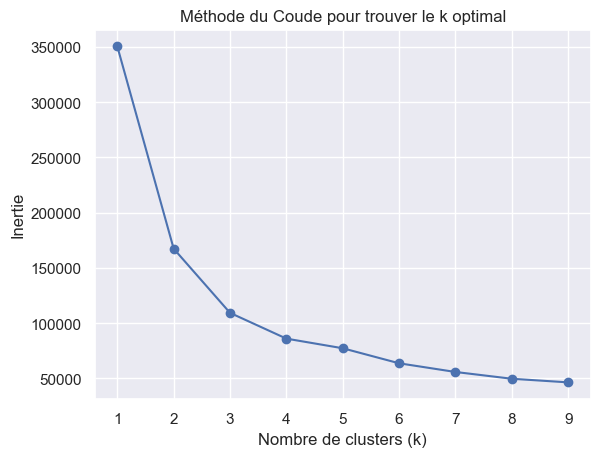

In [323]:
from sklearn.cluster import KMeans

x = s_df.drop(columns=['Target'], axis=1)
y = s_df["Target"]
# Trouver le nombre optimal de clusters avec la "Méthode du Coude"
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x)
    inertia.append(kmeans.inertia_)

# Visualisation
import matplotlib.pyplot as plt
plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel("Nombre de clusters (k)")
plt.ylabel("Inertie")
plt.title("Méthode du Coude pour trouver le k optimal")
plt.show()

In [325]:
from sklearn.cluster import KMeans
# Clustering avec le k choisi
kmeans = KMeans(n_clusters=3, random_state=42)
s_df['Cluster'] = kmeans.fit_predict(x)



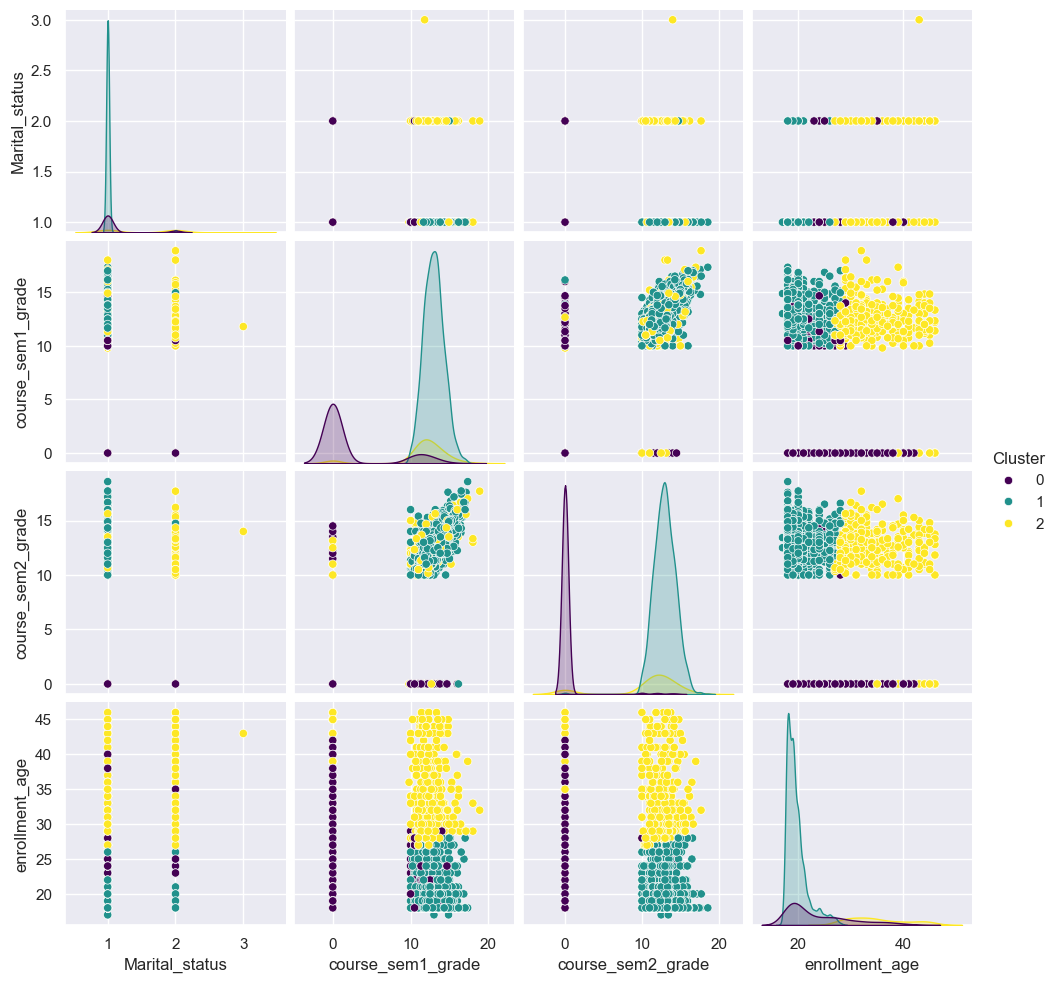

In [327]:
# Visualisation des clusters
col = ['Marital_status', 'course_sem1_grade', 'course_sem2_grade',
        'enrollment_age']
import seaborn as sns
sns.pairplot(s_df, vars=col, hue='Cluster', palette='viridis')
plt.show()

In [328]:
s_df.head()

,Marital_status,Previous_qualification,Displaced,Debtor,tuition_paid,Gender,has_scholarship,enrollment_age,course_sem1_enrolled,course_sem1_passed,course_sem1_grade,course_sem2_enrolled,course_sem2_passed,course_sem2_grade,Target,Cluster
0,1,0,1,0,1,1,0,20,0,0,0.00,0,0,0.00,0,0
1,1,0,1,0,0,1,0,19,6,6,14.00,6,6,13.67,1,1
2,1,0,1,0,0,1,0,19,6,0,0.00,6,0,0.00,0,0
3,1,0,1,0,1,0,0,20,6,6,13.43,6,5,12.40,1,1
4,2,0,0,0,1,0,0,45,6,5,12.33,6,6,13.00,1,2


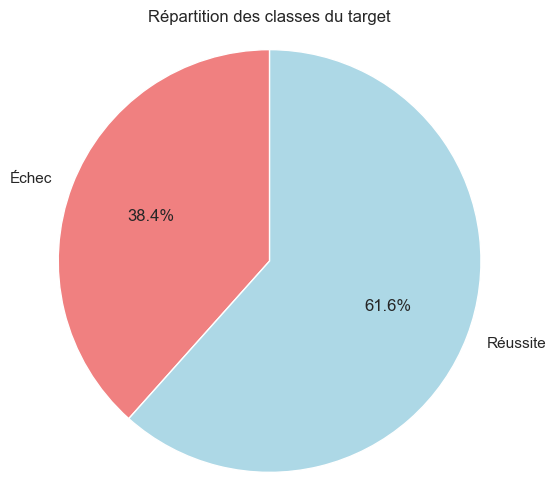

In [331]:
import matplotlib.pyplot as plt
from collections import Counter

# Comptage des classes avant SMOTE
counts = Counter(s_df["Target"])

# Diagramme circulaire
plt.figure(figsize=(6, 6))
plt.pie(
    counts.values(),
    labels=["Échec", "Réussite"],
    autopct='%1.1f%%',
    startangle=90,
    colors=['lightcoral', 'lightblue']
)
plt.title("Répartition des classes du target")
plt.axis('equal')  # Cercle parfait
plt.show()


In [333]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
x = s_df.drop(columns=['Target'], axis=1)
y = s_df["Target"]

# Suppose que tu as déjà défini X et y
X_train, X_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.2, random_state=42)

# Appliquer SMOTE uniquement sur les données d'entraînement
# smote = SMOTE(random_state=42)
smote = SMOTE(sampling_strategy = 'minority')


X_train, y_train = smote.fit_resample(X_train, y_train)

# Vérification des nouvelles dimensions
print("Avant SMOTE :", y_train.value_counts())
print("Après SMOTE :", y_train.value_counts())


Avant SMOTE : Target
1    1493
0    1493
Name: count, dtype: int64
Après SMOTE : Target
1    1493
0    1493
Name: count, dtype: int64


In [337]:
X_test.head()

,Marital_status,Previous_qualification,Displaced,Debtor,tuition_paid,Gender,has_scholarship,enrollment_age,course_sem1_enrolled,course_sem1_passed,course_sem1_grade,course_sem2_enrolled,course_sem2_passed,course_sem2_grade,Cluster
1728,1,3,0,0,1,1,1,25,0,0,0.00,0,0,0.00,0
2362,1,0,1,0,1,0,0,19,6,6,15.71,6,6,14.67,1
1195,1,3,0,0,1,1,0,24,5,0,0.00,5,0,0.00,0
2851,1,0,1,0,1,0,0,19,6,6,12.17,6,6,11.00,1
2714,1,0,1,0,1,0,0,20,7,6,13.38,7,6,13.38,1


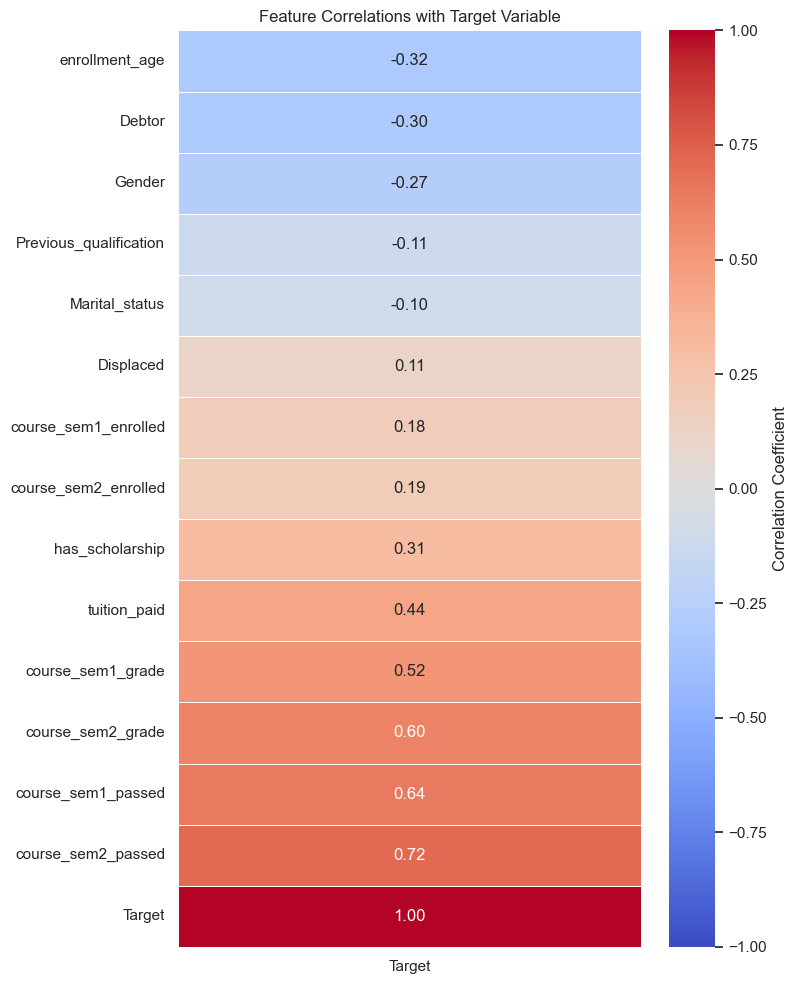

In [259]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate correlations with target
correlations = s_df.corr()["Target"].sort_values()

# Create heatmap
plt.figure(figsize=(8, 10))
sns.heatmap(correlations.to_frame(),
            annot=True,
            cmap='coolwarm',
            center=0,
            vmin=-1,
            vmax=1,
            fmt=".2f",
            linewidths=0.5,
            cbar_kws={'label': 'Correlation Coefficient'})

plt.title('Feature Correlations with Target Variable')
plt.tight_layout()
plt.show()

In [261]:
s_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3029 entries, 0 to 3028
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Marital_status          3029 non-null   int64  
 1   Previous_qualification  3029 non-null   int64  
 2   Displaced               3029 non-null   int64  
 3   Debtor                  3029 non-null   int64  
 4   tuition_paid            3029 non-null   int64  
 5   Gender                  3029 non-null   int64  
 6   has_scholarship         3029 non-null   int64  
 7   enrollment_age          3029 non-null   int64  
 8   course_sem1_enrolled    3029 non-null   int64  
 9   course_sem1_passed      3029 non-null   int64  
 10  course_sem1_grade       3029 non-null   float64
 11  course_sem2_enrolled    3029 non-null   int64  
 12  course_sem2_passed      3029 non-null   int64  
 13  course_sem2_grade       3029 non-null   float64
 14  Target                  3029 non-null   

In [133]:
scaler = StandardScaler()
scaled = scaler.fit_transform(x)

In [263]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Liste des modèles à tester
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Naive Bayes": GaussianNB()
}

# Test de chaque modèle avec Cross-Validation
for name, model in models.items():
    print(f"\n🔍 {name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print("Test Accuracy :", model.score(X_test, y_test))
    print("Classification Report:\n", classification_report(y_test, y_pred))

    # Cross-validation (sur les données équilibrées d'entraînement)
    cv_scores = cross_val_score(model, X_train, y_train, cv=5)
    print("Cross-Validation Accuracy: %.2f%% (+/- %.2f%%)" % (cv_scores.mean()*100, cv_scores.std()*100))

    # Matrice de confusion
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:\n", cm)



🔍 Logistic Regression
Test Accuracy : 0.9026402640264026
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.86      0.87       233
           1       0.92      0.93      0.92       373

    accuracy                           0.90       606
   macro avg       0.90      0.90      0.90       606
weighted avg       0.90      0.90      0.90       606

Cross-Validation Accuracy: 90.46% (+/- 1.19%)
Confusion Matrix:
 [[201  32]
 [ 27 346]]

🔍 Random Forest
Test Accuracy : 0.8894389438943895
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.80      0.85       233
           1       0.88      0.95      0.91       373

    accuracy                           0.89       606
   macro avg       0.89      0.87      0.88       606
weighted avg       0.89      0.89      0.89       606

Cross-Validation Accuracy: 91.49% (+/- 1.29%)
Confusion Matrix:
 [[186  47]
 [ 20 353]]

🔍 Support V

In [265]:
# 1. Entraîner le modèle
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# 2. Évaluer sur test set
y_pred = rf.predict(X_test)

print("✅ Accuracy:", rf.score(X_test, y_test))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))
print("📉 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# 3. Cross-validation (optionnel mais recommandé)
cv_scores = cross_val_score(rf, X_train, y_train, cv=5)
print("✅ Cross-Validation Accuracy: %.2f%% (+/- %.2f%%)" % (cv_scores.mean()*100, cv_scores.std()*100))

✅ Accuracy: 0.8877887788778878

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.80      0.85       233
           1       0.88      0.94      0.91       373

    accuracy                           0.89       606
   macro avg       0.89      0.87      0.88       606
weighted avg       0.89      0.89      0.89       606

📉 Confusion Matrix:
 [[187  46]
 [ 22 351]]
✅ Cross-Validation Accuracy: 91.39% (+/- 1.76%)


In [267]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Définir le modèle
rf = RandomForestClassifier(random_state=42)

# Grille d’hyperparamètres
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

# GridSearch avec validation croisée
grid_search = GridSearchCV(estimator=rf,
                           param_grid=param_grid,
                           cv=5,
                           n_jobs=-1,
                           scoring='accuracy',
                           verbose=2)

# Exécution
grid_search.fit(X_train, y_train)

# Résultat
print("✅ Meilleurs paramètres trouvés :", grid_search.best_params_)
print("✅ Meilleure accuracy (CV) :", grid_search.best_score_)


Fitting 5 folds for each of 432 candidates, totalling 2160 fits
✅ Meilleurs paramètres trouvés : {'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
✅ Meilleure accuracy (CV) : 0.9166098048772291


In [269]:
best_rf = grid_search.best_estimator_

# Évaluation sur le test set
y_pred = best_rf.predict(X_test)
print(y_pred)
print("🎯 Accuracy :", best_rf.score(X_test, y_test))
print("📊 Classification Report:\n", classification_report(y_test, y_pred))

[1 1 0 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 0 1 1 0 1 0 1 1 1 1 0 0 0 0 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1 1 1 1 1 0 1 0 0 1 0 0 1 1 1 1
 1 0 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1 0 1 1 0 1 1 0 1 0 0 0 0 1 1 0
 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 0 0 0 1 0 1 0 1 1 0 0 1 1 1 1 1 0 1 1
 0 1 0 0 0 1 1 1 0 1 1 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 1 1 1 1 1 0 0 1 1 1 0
 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0 0
 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 0 1 0 1 0 0 1 0 1 0 1 0 1 1 1 0 0 1 1 1 1 1
 0 1 1 1 0 1 0 1 0 0 1 0 1 0 1 0 0 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0
 0 1 0 1 1 0 1 0 1 0 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1
 1 1 1 0 1 1 0 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 0 0 1 1 0 1 1 1 1
 0 0 0 1 1 1 1 0 1 1 1 0 1 0 1 1 0 0 0 0 1 0 1 0 1 1 1 0 1 0 0 1 1 0 1 0 1
 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 0 0 0 0 1 1 1 

In [271]:
print(X_test.iloc[1]) 

Marital_status             1.00
Previous_qualification     0.00
Displaced                  1.00
Debtor                     0.00
tuition_paid               1.00
Gender                     0.00
has_scholarship            0.00
enrollment_age            19.00
course_sem1_enrolled       6.00
course_sem1_passed         6.00
course_sem1_grade         15.71
course_sem2_enrolled       6.00
course_sem2_passed         6.00
course_sem2_grade         14.67
Name: 2362, dtype: float64


In [151]:
print(X_test.head())

      Marital_status  Previous_qualification  Displaced  Debtor  tuition_paid  \
1728               1                       3          0       0             1   
2362               1                       0          1       0             1   
1195               1                       3          0       0             1   
2851               1                       0          1       0             1   
2714               1                       0          1       0             1   

      Gender  has_scholarship  enrollment_age  course_sem1_enrolled  \
1728       1                1              25                     0   
2362       0                0              19                     6   
1195       1                0              24                     5   
2851       0                0              19                     6   
2714       0                0              20                     7   

      course_sem1_passed  course_sem1_grade  course_sem2_enrolled  \
1728             

In [273]:
import pandas as pd

# Manually define the sample data as a dictionary
data = {
    'Marital_status': [1.0],
    'Previous_qualification': [3.0],
    'Displaced': [0.0],
    'Debtor': [0.0],
    'tuition_paid': [1.0],
    'Gender': [1.0],
    'has_scholarship': [0.0],
    'enrollment_age': [24.0],
    'course_sem1_enrolled': [5.0],
    'course_sem1_passed': [6.0],
    'course_sem1_grade': [10.0],
    'course_sem2_enrolled': [5.0],
    'course_sem2_passed': [5.0],
    'course_sem2_grade': [11.0],
}
# Create a DataFrame with a single row
sample = pd.DataFrame(data)

# Predict using your trained model
y_sample_pred = best_rf.predict(sample)
print(best_rf.predict_proba(sample))

# Display the prediction
print("Prediction:", y_sample_pred)


[[0.45791667 0.54208333]]
Prediction: [1]


In [275]:
import pickle
with open('random_forest.pkl', 'wb') as f:
    pickle.dump(best_rf, f)

In [872]:
with open('scaler2.pkl', 'wb') as f:
    pickle.dump(scaler, f)

In [858]:
import joblib

# Save the best estimator from GridSearchCV
joblib.dump(best_rf, "student_performance_formulaire.pkl")
joblib.dump(scaler, "scaler.pkl")
print("✅ Model saved successfully!")

✅ Model saved successfully!


In [326]:
X_train.columns

Index(['Marital_status', 'Previous_qualification', 'Displaced', 'Debtor',
       'tuition_paid', 'Gender', 'has_scholarship', 'enrollment_age',
       'course_sem1_enrolled', 'course_sem1_passed', 'course_sem1_grade',
       'course_sem2_enrolled', 'course_sem2_passed', 'course_sem2_grade'],
      dtype='object')